In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
mkdir CNN

In [3]:
%cd /content/drive/MyDrive/CNN

/content/drive/MyDrive/CNN


In [4]:
import os
# os.environ['KAGGLE_USERNAME'] = "nandhakumar5321" # username from the json file
# os.environ['KAGGLE_KEY'] = "cd3f45b0f739ad624b963b7c66bce959" # key from the json file
# !kaggle datasets download -d sachinkumar413/monkeypox-images-dataset # api copied from kaggle

In [5]:
from zipfile import ZipFile

file_name = "/content/drive/MyDrive/CNN/archive (4).zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
import warnings
import os
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/drive/MyDrive/CNN/dataset')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/drive/MyDrive/CNN/dataset"))
file_count = len(files)
# print(file_count)

In [7]:
# Make new base directory
original_dataset_dir = '/content/drive/MyDrive/CNN/'
base_dir = '/content/drive/MyDrive/CNN/datapox'
os.mkdir(base_dir)

In [8]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)


train_helmet_dir = os.path.join(train_dir, 'Helmet')
os.mkdir(train_helmet_dir)

train_non-helmet_dir = os.path.join(train_dir, 'non-helmet')
os.mkdir(train_non-helmet_dir)

train_triples_dir = os.path.join(train_dir, 'Triples')
os.mkdir(train_triples_dir)

train_License-plate_dir = os.path.join(train_dir, 'License-plate')
os.mkdir(train_License-plate_dir)

train_person_dir = os.path.join(train_dir, 'person')
os.mkdir(train_person_dir)


In [9]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [10]:
HELMET_SOURCE_DIR = '/content/drive/MyDrive/CNN/dataset/HELMET/'
TRAINING_HELMET_DIR = '/content/drive/MyDrive/CNN/data/train/HELMET/'
VALID_HELMET_DIR = '/content/drive/MyDrive/CNN/data/validation/HELMET/'

NON-HELMET_SOURCE_DIR = '/content/drive/MyDrive/CNN/dataset/NON-HELMET/'
TRAINING_NON-HELMET_DIR = '/content/drive/MyDrive/CNN/data/train/NON-HELMET/'
VALID_NON-HELMET_DIR = '/content/drive/MyDrive/CNN/data/validation/NON-HELMET/'

TRIPLES_SOURCE_DIR = '/content/drive/MyDrive/CNN/dataset/TRIPLES/'
TRAINING_TRIPLES_DIR = '/content/drive/MyDrive/CNN/data/train/TRIPLES/'
VALID_TRIPLES_DIR = '/content/drive/MyDrive/CNN/data/validation/TRIPLES/'

LICENSE-PLATE_SOURCE_DIR = '/content/drive/MyDrive/CNN/dataset/LICENSE-PLATE/'
TRAINING_LICENSE-PLATE_DIR = '/content/drive/MyDrive/CNN/data/train/LICENSE-PLATE/'
VALID_LICENSE-PLATE_DIR = '/content/drive/MyDrive/CNN/data/validation/LICENSE-PLATE/'

PERSON_SOURCE_DIR = '/content/drive/MyDrive/CNN/dataset/PERSON/'
TRAINING_PERSON_DIR = '/content/drive/MyDrive/CNN/data/train/PERSON/'
VALID_PERSON_DIR = '/content/drive/MyDrive/CNN/data/validation/PERSON/'


In [11]:
import os
import random
from shutil import copyfile

split_size = .85

split_data(HELMET_SOURCE_DIR, TRAINING_HELMET_DIR, VALID_HELMET_DIR, split_size)
split_data(NON-HELMET_SOURCE_DIR, TRAINING_NON-HELMET_DIR, VALID_NON-HELMET_DIR, split_size)
split_data(TRIPLES_SOURCE_DIR, TRAINING_TRIPLES_DIR, VALID_TRIPLES_DIR, split_size)
split_data(LICENSE-PLATE_SOURCE_DIR, TRAINING_LICENSE-PLATE_DIR, VALID_LICENSE-PLATE_DIR, split_size)
split_data(PERSON_SOURCE_DIR, TRAINING_PERSON_DIR, VALID_PERSON_DIR, split_size)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['Helmet', 'Non-Helmet', 'Triples', 'Licens-plate', 'Person']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/CNN/data/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [ ]:
for i in ['helmet', 'non-helmet', 'triples', 'license-plate', 'person']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/CNN/data/train/'+i+'/'))))

In [ ]:
image_folder = ['helmet', 'non-helmet', 'triples', 'license-plate', 'person']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/CNN/data/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [ ]:
for i in ['helmet', 'non-helmet', 'triples', 'license-plate', 'plate']:
    print('Valid {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/CNN/data/validation/'+i+'/'))))

In [ ]:
img_width=416; img_height=416
batch_size=32

In [ ]:
TRAINING_DIR = '/content/drive/MyDrive/CNN/data/train'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

In [ ]:
VALIDATION_DIR = '/content/drive/MyDrive/CNN/data/validation'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/CNN/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        3

In [ ]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=20,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/20
1103/1103 [==============================] - ETA: 0s - loss: 1.3582 - accuracy: 0.4672

1103/1103 [==============================] - 614s 545ms/step - loss: 1.3582 - accuracy: 0.4672 - val_loss: 1.1690 - val_accuracy: 0.5286
Epoch 2/20
1103/1103 [==============================] - ETA: 0s - loss: 1.1856 - accuracy: 0.5410

1103/1103 [==============================] - 589s 534ms/step - loss: 1.1856 - accuracy: 0.5410 - val_loss: 1.0998 - val_accuracy: 0.5772
Epoch 3/20
1103/1103 [==============================] - ETA: 0s - loss: 1.0533 - accuracy: 0.6019

1103/1103 [==============================] - 587s 532ms/step - loss: 1.0533 - accuracy: 0.6019 - val_loss: 0.9189 - val_accuracy: 0.6562
Epoch 4/20
1103/1103 [==============================] - ETA: 0s - loss: 0.9124 - accuracy: 0.6569

1103/1103 [==============================] - 587s 532ms/step - loss: 0.9124 - accuracy: 0.6569 - val_loss: 0.7735 - val_accuracy: 0.7156
Epoch 5/20
1103/1103 [==============================] - ETA: 0s - loss: 0.7893 - accuracy: 0.7035

1103/1103 [==============================] - 584s 530ms/step - loss: 0.7893 - accuracy: 0.7035 - val_loss: 0.6794 - val_accuracy: 0.7453
Epoch 6/20
1103/1103 [==============================] - ETA: 0s - loss: 0.6859 - accuracy: 0.7436

1103/1103 [==============================] - 584s 530ms/step - loss: 0.6859 - accuracy: 0.7436 - val_loss: 0.5646 - val_accuracy: 0.7948
Epoch 7/20
1103/1103 [==============================] - ETA: 0s - loss: 0.6034 - accuracy: 0.7795

1103/1103 [==============================] - 586s 531ms/step - loss: 0.6034 - accuracy: 0.7795 - val_loss: 0.5006 - val_accuracy: 0.8211
Epoch 8/20
1103/1103 [==============================] - ETA: 0s - loss: 0.5260 - accuracy: 0.8092

1103/1103 [==============================] - 580s 526ms/step - loss: 0.5260 - accuracy: 0.8092 - val_loss: 0.4118 - val_accuracy: 0.8523
Epoch 9/20
1103/1103 [==============================] - ETA: 0s - loss: 0.4743 - accuracy: 0.8289

1103/1103 [==============================] - 580s 526ms/step - loss: 0.4743 - accuracy: 0.8289 - val_loss: 0.3506 - val_accuracy: 0.8732
Epoch 10/20
1103/1103 [==============================] - ETA: 0s - loss: 0.4208 - accuracy: 0.8509

1103/1103 [==============================] - 579s 525ms/step - loss: 0.4208 - accuracy: 0.8509 - val_loss: 0.3014 - val_accuracy: 0.8974
Epoch 11/20
1103/1103 [==============================] - ETA: 0s - loss: 0.3955 - accuracy: 0.8605

1103/1103 [==============================] - 584s 530ms/step - loss: 0.3955 - accuracy: 0.8605 - val_loss: 0.2463 - val_accuracy: 0.9139
Epoch 12/20
1103/1103 [==============================] - ETA: 0s - loss: 0.3583 - accuracy: 0.8753

1103/1103 [==============================] - 583s 528ms/step - loss: 0.3583 - accuracy: 0.8753 - val_loss: 0.2421 - val_accuracy: 0.9160
Epoch 13/20
1103/1103 [==============================] - ETA: 0s - loss: 0.3359 - accuracy: 0.8848

1103/1103 [==============================] - 583s 528ms/step - loss: 0.3359 - accuracy: 0.8848 - val_loss: 0.1942 - val_accuracy: 0.9334
Epoch 14/20
1103/1103 [==============================] - ETA: 0s - loss: 0.3103 - accuracy: 0.8928

1103/1103 [==============================] - 582s 527ms/step - loss: 0.3103 - accuracy: 0.8928 - val_loss: 0.1820 - val_accuracy: 0.9366
Epoch 15/20
1103/1103 [==============================] - ETA: 0s - loss: 0.2901 - accuracy: 0.9009

1103/1103 [==============================] - 586s 532ms/step - loss: 0.2901 - accuracy: 0.9009 - val_loss: 0.2090 - val_accuracy: 0.9314
Epoch 16/20
1103/1103 [==============================] - ETA: 0s - loss: 0.2775 - accuracy: 0.9061

1103/1103 [==============================] - 587s 532ms/step - loss: 0.2775 - accuracy: 0.9061 - val_loss: 0.2074 - val_accuracy: 0.9318
Epoch 17/20
1103/1103 [==============================] - ETA: 0s - loss: 0.2713 - accuracy: 0.9088

1103/1103 [==============================] - 577s 524ms/step - loss: 0.2713 - accuracy: 0.9088 - val_loss: 0.1689 - val_accuracy: 0.9451
Epoch 18/20
1103/1103 [==============================] - ETA: 0s - loss: 0.2490 - accuracy: 0.9173

1103/1103 [==============================] - 579s 525ms/step - loss: 0.2490 - accuracy: 0.9173 - val_loss: 0.1764 - val_accuracy: 0.9443
Epoch 19/20
1103/1103 [==============================] - ETA: 0s - loss: 0.2518 - accuracy: 0.9154

1103/1103 [==============================] - 582s 528ms/step - loss: 0.2518 - accuracy: 0.9154 - val_loss: 0.1431 - val_accuracy: 0.9552
Epoch 20/20
1103/1103 [==============================] - ETA: 0s - loss: 0.2242 - accuracy: 0.9254

1103/1103 [==============================] - 577s 524ms/step - loss: 0.2242 - accuracy: 0.9254 - val_loss: 0.1982 - val_accuracy: 0.9419


In [ ]:
model.save('/content/drive/MyDrive/CNN/dest.h5')

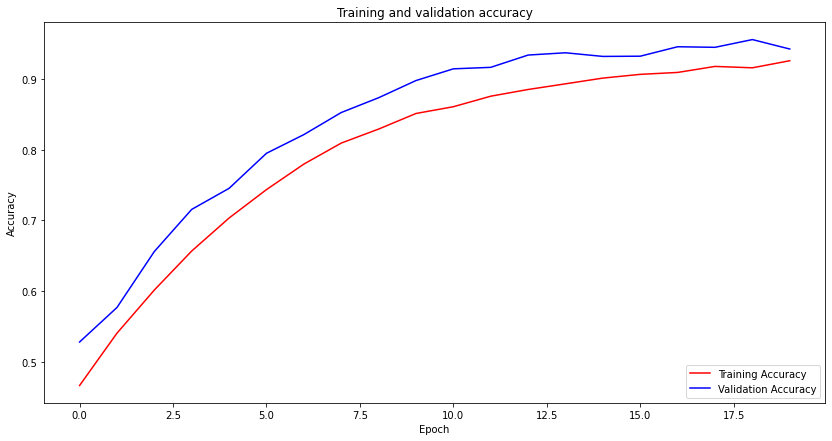

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

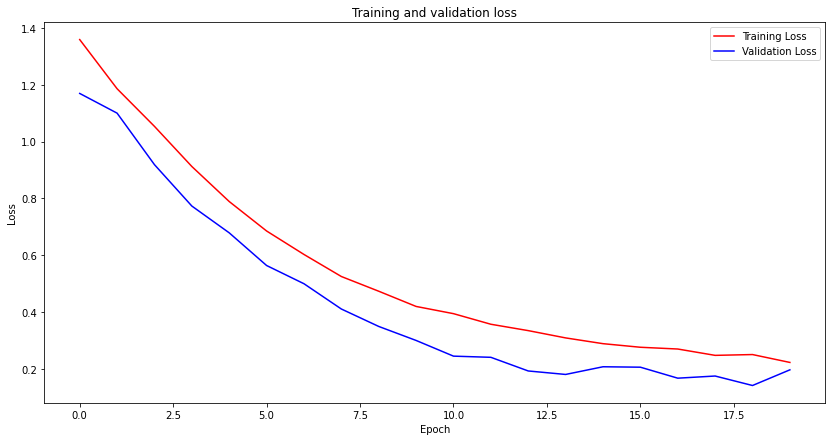

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')